<a href="https://colab.research.google.com/github/ACE403/AI-lab-problem-1/blob/main/AI_PROBLEM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import numpy as np
import matplotlib.pyplot as plt


Total Iterations:  89072
VALUE FUNCTION:
{0: 9409.859743233244, 1: 10325.022676179224, 2: 12554.096459941387, 3: 17990.61446728664, 4: 26619.83307482566, 5: 50841.84329083648, 6: 74485.08813172826, 7: 168421.45710913814, 8: 215598.23356948444, 9: 202804.25385444047}
TIMES ENTERED:
{0: 100.0, 1: 99.0154032692653, 2: 89.04144961379558, 3: 71.16265493084246, 4: 50.14370396982216, 5: 29.953296209807796, 6: 14.877851625651159, 7: 5.867163642895635, 8: 1.722202263337525, 9: 0.36711873540506557}
EXPECTED REWARD:  97612.06262873046


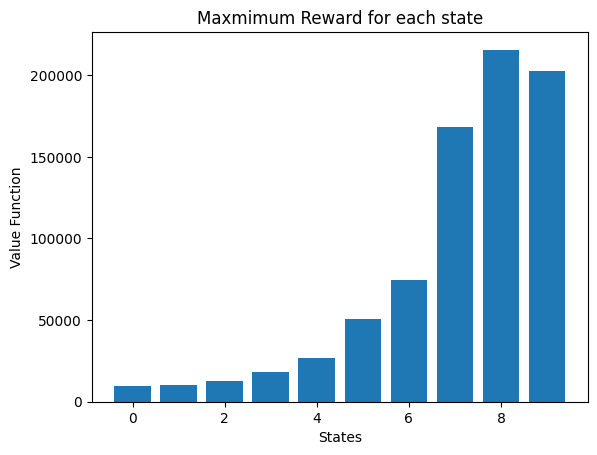

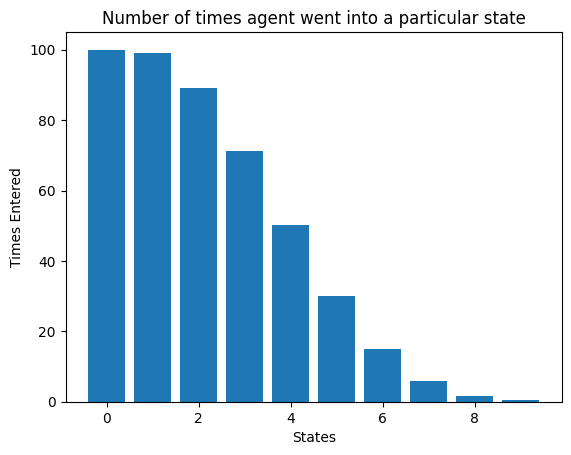

In [11]:
class NODE:
    def __init__(self, reward, correctProbability):
        self.REWARD = reward
        self.PROBABILITY = correctProbability
        self.next = None

class AGENT:
    def __init__(self):
        self.N = 10
        self.THETA = 0.0001
        self.DISCOUNT_FACTOR = 0.9
        self.ACTIONS = ["CONTINUE", "QUIT"]
        
        REWARDS = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
        CORRECT_ANSWER_PROBABILITY = [0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
        
        START_NODE = NODE(-1,0)
        TEMP = START_NODE
        
        for i in range(self.N):  
            TEMP.next = NODE(REWARDS[i],CORRECT_ANSWER_PROBABILITY[i])
            TEMP = TEMP.next
        
        self.START_STATE = START_NODE.next        


class MDP_SOLUTION:
    def __init__(self):
        self.agent = AGENT()
        self.VALUE_FUNCTION = {s: 0 for s in range(self.agent.N)}
        self.ITERATIONS = 0
        self.TIMES_ENTERED = {s: 0 for s in range(self.agent.N)}
        self.TERMINATOR = False
        self.PLOT_STATES = [x for x in range(self.agent.N)]
    
    def helper(self, state, iteration):
        if(state == None): return 0
        self.TIMES_ENTERED[iteration] += 1
    
        OLD_VALUE = self.VALUE_FUNCTION[iteration]
        REWARD_ACHIEVED = 0
        if iteration == 0:
            QUIT_REWARD = 0
        else:
            QUIT_REWARD = self.VALUE_FUNCTION[iteration-1]
        
        ANSWER = np.random.rand()
        
        if ANSWER <= state.PROBABILITY:
            REWARD_ACHIEVED = state.PROBABILITY * (state.REWARD + (self.agent.DISCOUNT_FACTOR * self.helper(state.next, iteration+1)))
            self.VALUE_FUNCTION[iteration] = (self.VALUE_FUNCTION[iteration] * self.TIMES_ENTERED[iteration] + REWARD_ACHIEVED)/(self.TIMES_ENTERED[iteration]+1)
            
            if(abs(self.VALUE_FUNCTION[iteration] - OLD_VALUE) < self.agent.THETA):
                self.TERMINATOR = True

        return max(QUIT_REWARD, REWARD_ACHIEVED)
    
    def solver(self):
        while self.TERMINATOR == False:
            self.ITERATIONS += 1
            HEAD = self.agent.START_STATE
            self.helper(HEAD, 0)
        
        print("Total Iterations: ", self.ITERATIONS)
        print("VALUE FUNCTION:")
        print(self.VALUE_FUNCTION)
        
        for i in range(self.agent.N):
            self.TIMES_ENTERED[i] = (self.TIMES_ENTERED[i] / self.ITERATIONS) * 100
        
        print("TIMES ENTERED:")
        print(self.TIMES_ENTERED)
        
        EXPECTATION = 0
        for i in range(self.agent.N):
            EXPECTATION = EXPECTATION + ((self.TIMES_ENTERED[i]/100) * self.VALUE_FUNCTION[i])
        
        print("EXPECTED REWARD: ", EXPECTATION)
        plt.bar(self.PLOT_STATES, self.VALUE_FUNCTION.values())
        plt.xlabel('States')
        plt.ylabel('Value Function')
        plt.title('Maxmimum Reward for each state')
        plt.show()
        
        plt.bar(self.PLOT_STATES, self.TIMES_ENTERED.values())
        plt.xlabel('States')
        plt.ylabel('Times Entered')
        plt.title('Number of times agent went into a particular state')
        plt.show()

MDP_SOLUTION().solver()